<a href="https://colab.research.google.com/github/vdrobin1/first/blob/main/lstmMadison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Summer21

/content/drive/MyDrive/Summer21


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [5]:
Madison=pd.DataFrame(pd.read_csv("MadisonDailyM.csv"))

In [6]:
Madison

,Unnamed: 0,DATE,Daily_WL,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,YEAR
0,0,2011-02-16,19.563810,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,0.0,69.0,46.0,2011
1,1,2011-02-17,34.305833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,0.0,68.0,42.0,2011
2,2,2011-02-18,34.415833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,0.0,68.0,53.0,2011
3,3,2011-02-19,34.545833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,0.0,66.0,50.0,2011
4,4,2011-02-20,34.604167,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,0.0,74.0,48.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,3361,2020-05-01,28.090833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,60.0,76.0,43.0,2020
3362,3362,2020-05-02,28.445833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,66.0,83.0,51.0,2020
3363,3363,2020-05-03,28.760833,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,71.0,85.0,58.0,2020
3364,3364,2020-05-04,29.043333,USW00003856,"HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD, ...",34.64389,-86.78611,190.2,0.0,0.0,0.0,0.0,0.0,70.0,84.0,60.0,2020


In [7]:
Madison['PRCP'].unique() #just checking to make sure that PRCP has more than just zeros in it

array([0.  , 0.02, 0.44, 0.11, 0.54, 0.16, 2.24, 0.03, 0.92, 1.98, 0.7 ,
       0.1 , 0.09, 2.09, 0.53, 0.47, 0.4 , 0.05, 2.25, 0.66, 1.81, 1.39,
       0.41, 3.5 , 0.87, 0.14, 0.06, 0.04, 0.64, 0.22, 0.15, 0.78, 0.23,
       0.13, 0.07, 0.33, 0.48, 1.52, 0.77, 0.95, 1.57, 0.36, 0.52, 4.42,
       0.26, 0.01, 0.34, 0.71, 0.2 , 0.19, 0.59, 2.36, 0.57, 0.93, 0.17,
       1.14, 1.32, 0.62, 0.18, 2.42, 0.69, 1.7 , 1.2 , 0.82, 0.08, 0.75,
       0.6 , 1.06, 1.47, 0.12, 0.46, 1.29, 0.29, 0.37, 0.42, 0.28, 0.27,
       1.6 , 1.62, 1.34, 0.25, 0.3 , 0.24, 0.63, 0.79, 1.66, 3.69, 0.68,
       1.55, 1.04, 1.28, 2.46, 0.67, 1.5 , 0.35, 0.49, 0.97, 1.33, 2.02,
       0.32, 0.38, 0.55, 0.45, 0.86, 1.23, 1.65, 0.85, 2.11, 0.74, 1.38,
       0.43, 1.  , 4.64, 0.21, 0.61, 1.16, 0.9 , 2.68, 1.54, 1.05, 0.65,
       1.07, 0.76, 0.58, 1.56, 1.11, 2.14, 0.98, 0.39, 1.69, 0.5 , 1.13,
       0.31, 1.01, 0.91, 0.56, 2.32, 1.86, 1.61, 1.35, 1.03, 0.73, 0.51,
       0.88, 0.72, 2.15, 0.83, 2.23, 1.08, 3.87, 1.

## **Part 1**

In [8]:
# Importing Training Set
dataset_train = Madison[['DATE', 'Daily_WL', 'PRCP','TMAX','TMIN']].copy()

In [9]:
#import scipy.stats as stats

In [10]:
#dataset_train['Daily_WL']=dataset_train[['Daily_WL']].apply(stats.zscore)

In [11]:
dataset_train.head()

,DATE,Daily_WL,PRCP,TMAX,TMIN
0,2011-02-16,19.563810,0.0,69.0,46.0
1,2011-02-17,34.305833,0.0,68.0,42.0
2,2011-02-18,34.415833,0.0,68.0,53.0
3,2011-02-19,34.545833,0.0,66.0,50.0
4,2011-02-20,34.604167,0.0,74.0,48.0


In [57]:
print(dataset_train['Daily_WL'].max())
print(dataset_train['Daily_WL'].min())

37.848333333333336
17.45375


In [12]:

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:5]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['DATE'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (3366, 5)
All timestamps == 3366
Featured selected: ['Daily_WL', 'PRCP', 'TMAX', 'TMIN']


In [13]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (3366, 4).


array([[19.56380952,  0.        , 69.        , 46.        ],
       [34.30583333,  0.        , 68.        , 42.        ],
       [34.41583333,  0.        , 68.        , 53.        ],
       ...,
       [28.76083333,  0.        , 85.        , 58.        ],
       [29.04333333,  0.        , 84.        , 60.        ],
       [29.30083333,  0.        , 76.        , 56.        ]])

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-4.23124768],
       [ 0.36664813],
       [ 0.40095608],
       ...,
       [-1.36278418],
       [-1.27467514],
       [-1.19436336]])

In [15]:
training_set_scaled

array([[-4.23124768, -0.36910794, -0.30745291, -0.41665239],
       [ 0.36664813, -0.36910794, -0.36909733, -0.66998547],
       [ 0.40095608, -0.36910794, -0.36909733,  0.0266805 ],
       ...,
       [-1.36278418, -0.36910794,  0.67885778,  0.34334686],
       [-1.27467514, -0.36910794,  0.61721336,  0.4700134 ],
       [-1.19436336, -0.36910794,  0.12405802,  0.21668032]])

In [16]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 7   # Number of days we want top predict into the future
n_past = 30     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (3330, 30, 3).
y_train shape == (3330, 1).


### **PART 2**

In [17]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
#from keras.layers import Adam

In [18]:
dataset_train

,Daily_WL,PRCP,TMAX,TMIN
0,19.563810,0.0,69.0,46.0
1,34.305833,0.0,68.0,42.0
2,34.415833,0.0,68.0,53.0
3,34.545833,0.0,66.0,50.0
4,34.604167,0.0,74.0,48.0
...,...,...,...,...
3361,28.090833,0.0,76.0,43.0
3362,28.445833,0.0,83.0,51.0
3363,28.760833,0.0,85.0,58.0
3364,29.043333,0.0,84.0,60.0


In [19]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
#model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [20]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
10/11 [==========================>...] - ETA: 0s - loss: 0.3427
Epoch 1: val_loss improved from inf to 0.52341, saving model to weights.h5
11/11 [==============================] - 9s 265ms/step - loss: 0.3407 - val_loss: 0.5234 - lr: 0.0100
Epoch 2/30
10/11 [==========================>...] - ETA: 0s - loss: 0.2268
Epoch 2: val_loss improved from 0.52341 to 0.46030, saving model to weights.h5
11/11 [==============================] - 1s 121ms/step - loss: 0.2284 - val_loss: 0.4603 - lr: 0.0100
Epoch 3/30
10/11 [==========================>...] - ETA: 0s - loss: 0.2073
Epoch 3: val_loss improved from 0.46030 to 0.38442, saving model to weights.h5
11/11 [==============================] - 1s 99ms/step - loss: 0.2116 - val_loss: 0.3844 - lr: 0.0100
Epoch 4/30
10/11 [==========================>...] - ETA: 0s - loss: 0.1952
Epoch 4: val_loss improved from 0.38442 to 0.38320, saving model to weights.h5
11/11 [==============================] - 1s 106ms/step - loss: 0.1948 - val_loss: 0

## **PART 3**

In [21]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [22]:
datelist_future

[Timestamp('2020-05-05 00:00:00', freq='D'),
 Timestamp('2020-05-06 00:00:00', freq='D'),
 Timestamp('2020-05-07 00:00:00', freq='D'),
 Timestamp('2020-05-08 00:00:00', freq='D'),
 Timestamp('2020-05-09 00:00:00', freq='D'),
 Timestamp('2020-05-10 00:00:00', freq='D'),
 Timestamp('2020-05-11 00:00:00', freq='D')]

In [23]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [24]:
predictions_future

array([[-1.5596685 ],
       [-1.2312318 ],
       [-1.1105254 ],
       [-1.0718201 ],
       [-0.97556645],
       [-0.9209121 ],
       [-0.8349733 ]], dtype=float32)

In [25]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Daily_WL']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Daily_WL']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Daily_WL
2011-04-23,29.130358
2011-04-24,29.347767
2011-04-25,29.295315


In [26]:
# Parse training set timestamp for better visualization
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


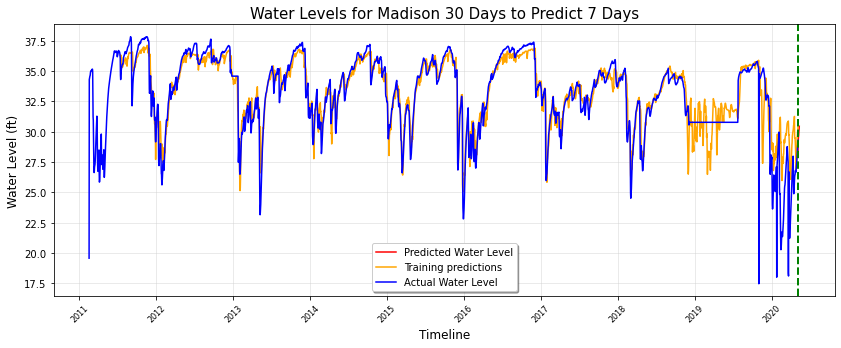

In [27]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2011-07-15'
START_DATE_FOR_PLOTTING2 ='2011-02-16'	
test_Mad30=plt.figure()
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Daily_WL'], color='r', label='Predicted Water Level')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Daily_WL'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING2:].index, dataset_train.loc[START_DATE_FOR_PLOTTING2:]['Daily_WL'], color='b', label='Actual Water Level')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Water Levels for Madison 30 Days to Predict 7 Days', family='Arial', fontsize=15)
plt.xlabel('Timeline', family='Arial', fontsize=12)
plt.ylabel('Water Level (ft)', family='Arial', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
test_Mad30.show()

In [28]:
test_Mad30.savefig('test_Mad30.png', bbox_inches='tight')

The actual data in 2019 for Madison may need soe investigation. It looks weird that it remained constant for several months in 2019, and I think that it should actually be closer to the prediction than it is. I also think its weird that the actual precipitation values dropped siginificantly for 2020.

In [29]:
PREDICTIONS_FUTURE=PREDICTIONS_FUTURE.reset_index()
PREDICTIONS_FUTURE=PREDICTIONS_FUTURE.rename(columns={'index':'DATE'})
PREDICTION_TRAIN=PREDICTION_TRAIN.reset_index()
PREDICTION_TRAIN=PREDICTION_TRAIN.rename(columns={'index':'DATE'})
PREDICTION_TRAIN

,DATE,Daily_WL
0,2011-04-23,29.130358
1,2011-04-24,29.347767
2,2011-04-25,29.295315
3,2011-04-26,28.947023
4,2011-04-27,27.486832
...,...,...
3295,2020-05-01,29.569639
3296,2020-05-02,29.693739
3297,2020-05-03,30.002352
3298,2020-05-04,30.177588


In [30]:
PREDICTIONS_FUTURE

,DATE,Daily_WL
0,2020-05-05,28.129572
1,2020-05-06,29.182623
2,2020-05-07,29.569639
3,2020-05-08,29.693739
4,2020-05-09,30.002352
5,2020-05-10,30.177588
6,2020-05-11,30.453129


In [31]:
PREDICTION_TRAIN['DATE']= pd.to_datetime(PREDICTION_TRAIN['DATE'])
PREDICTIONS_FUTURE['DATE']=pd.to_datetime(PREDICTIONS_FUTURE['DATE'])

In [32]:
#Madison['Daily_WL']=Madison[['Daily_WL']].apply(stats.zscore)
mad = Madison[['DATE', 'Daily_WL', 'PRCP']].copy()
mad['DATE']= pd.to_datetime(mad['DATE'])
mad

,DATE,Daily_WL,PRCP
0,2011-02-16,19.563810,0.0
1,2011-02-17,34.305833,0.0
2,2011-02-18,34.415833,0.0
3,2011-02-19,34.545833,0.0
4,2011-02-20,34.604167,0.0
...,...,...,...
3361,2020-05-01,28.090833,0.0
3362,2020-05-02,28.445833,0.0
3363,2020-05-03,28.760833,0.0
3364,2020-05-04,29.043333,0.0


In [33]:
error=pd.merge(mad,PREDICTION_TRAIN, on='DATE')
error

,DATE,Daily_WL_x,PRCP,Daily_WL_y
0,2011-04-23,27.004167,0.00,29.130358
1,2011-04-24,27.410833,0.00,29.347767
2,2011-04-25,27.882500,0.00,29.295315
3,2011-04-26,28.398333,0.41,28.947023
4,2011-04-27,28.510000,3.50,27.486832
...,...,...,...,...
3295,2020-05-01,28.090833,0.00,29.569639
3296,2020-05-02,28.445833,0.00,29.693739
3297,2020-05-03,28.760833,0.00,30.002352
3298,2020-05-04,29.043333,0.00,30.177588


In [34]:
error=error.rename(columns={'Daily_WL_x':'Actual', 'Daily_WL_y':'Prediction'})
error

,DATE,Actual,PRCP,Prediction
0,2011-04-23,27.004167,0.00,29.130358
1,2011-04-24,27.410833,0.00,29.347767
2,2011-04-25,27.882500,0.00,29.295315
3,2011-04-26,28.398333,0.41,28.947023
4,2011-04-27,28.510000,3.50,27.486832
...,...,...,...,...
3295,2020-05-01,28.090833,0.00,29.569639
3296,2020-05-02,28.445833,0.00,29.693739
3297,2020-05-03,28.760833,0.00,30.002352
3298,2020-05-04,29.043333,0.00,30.177588


In [35]:
error=error.drop(columns=['PRCP'])
error

,DATE,Actual,Prediction
0,2011-04-23,27.004167,29.130358
1,2011-04-24,27.410833,29.347767
2,2011-04-25,27.882500,29.295315
3,2011-04-26,28.398333,28.947023
4,2011-04-27,28.510000,27.486832
...,...,...,...
3295,2020-05-01,28.090833,29.569639
3296,2020-05-02,28.445833,29.693739
3297,2020-05-03,28.760833,30.002352
3298,2020-05-04,29.043333,30.177588


In [36]:
error['ERROR']=abs(error['Actual']-error['Prediction'])
error

,DATE,Actual,Prediction,ERROR
0,2011-04-23,27.004167,29.130358,2.126191
1,2011-04-24,27.410833,29.347767,1.936934
2,2011-04-25,27.882500,29.295315,1.412815
3,2011-04-26,28.398333,28.947023,0.548690
4,2011-04-27,28.510000,27.486832,1.023168
...,...,...,...,...
3295,2020-05-01,28.090833,29.569639,1.478806
3296,2020-05-02,28.445833,29.693739,1.247906
3297,2020-05-03,28.760833,30.002352,1.241518
3298,2020-05-04,29.043333,30.177588,1.134254


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


slope b1 is 0.7509816910391991
intercept b0 is 8.424880949582775


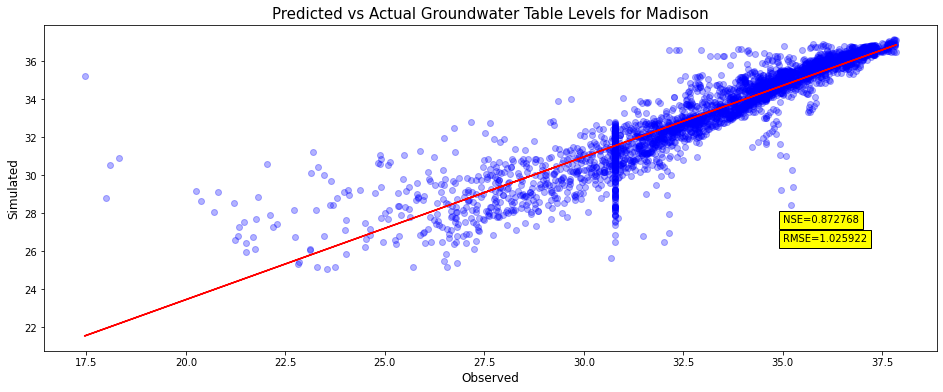

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

graph2_Mad=plt.figure(figsize=(16, 6))

x=np.array(error['Actual'])
y=np.array(error['Prediction'])

n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)
  
#plt.scatter(x,y)
#plt.xlabel('Independent variable X')
#plt.ylabel('Dependent variable y')

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'blue',alpha = 0.3)
plt.plot(x, y_pred, color = 'red')
plt.xlabel('Observed',fontsize=12,ha='center')
plt.ylabel('Simulated',fontsize=12,ha='center')
plt.text(35.0,27.5,'NSE=0.872768',bbox={"fc":"yellow"})
plt.text(35.0,26.5,'RMSE=1.025922',bbox={"fc":"yellow"})

plt.title("Predicted vs Actual Groundwater Table Levels for Madison",fontsize=15,ha='center')
graph2_Mad.savefig('graph2_Mad.png',dpi=400,bbox_inches='tight')

In [38]:
#Calculate NSE https://agrimetsoft.com/calculators/Nash%20Sutcliffe%20model%20Efficiency%20coefficient
a1=np.array(error['Actual']) 
a2=np.array(error['Prediction']) 
denominator = np.sum((a1 - np.mean(a1)) ** 2)
numerator = np.sum((a2 - a1) ** 2)
nse_val = 1 - numerator / denominator
print(nse_val)

0.8226352217940867


In [39]:
x = x.reshape(-1,1)
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse=mean_squared_error(y,y_predicted)
  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)


# printing values
print('Slope:',regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [0.75098926]
Intercept: 8.424627369870741
MSE: 1.1310857212377212
Root mean squared error:  1.063525138977787
R2 score:  0.8332574557250285


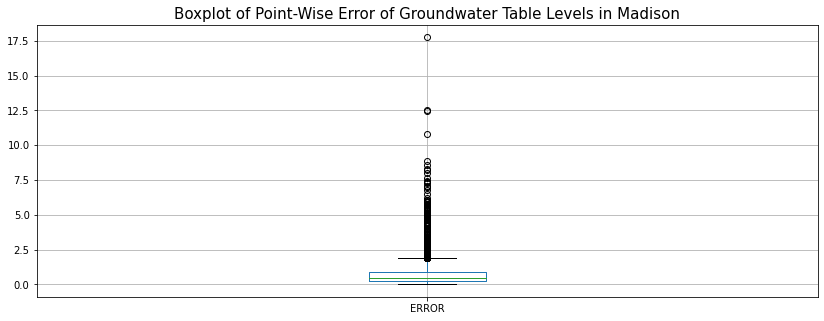

In [56]:
fig100 = plt.figure()
plt.title("Boxplot of Point-Wise Error of Groundwater Table Levels in Madison", fontsize=15,ha='center')
error_MAD=error.boxplot(column=['ERROR'], return_type='axes')
fig100.savefig('boxplot1_Mad.png',dpi=400,bbox_inches='tight')

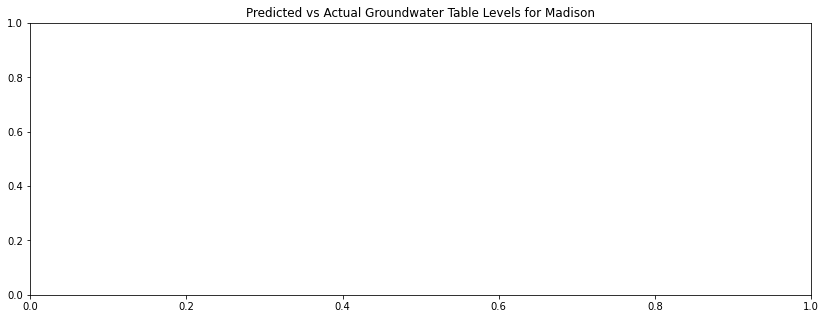

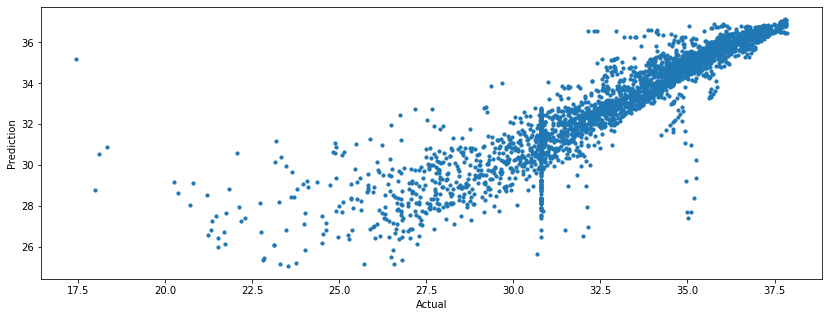

In [41]:
graph1_Mad=plt.figure()
plt.title("Predicted vs Actual Groundwater Table Levels for Madison")
error.plot.scatter(x = 'Actual', y = 'Prediction', s = 10)


In [42]:
graph1_Mad.savefig('graph12_Mad.png', bbox_inches='tight')

In [43]:
#calculating RMSE from data frame
from sklearn.metrics import mean_squared_error 
realVals = error['Actual']
predictedVals = error['Prediction']
mse = mean_squared_error(realVals, predictedVals)
# If you want the root mean squared error
# rmse = mean_squared_error(realVals, predictedVals, squared = False)
mse

1.777576217764688

0.00022130330403768994
17.752388610839844


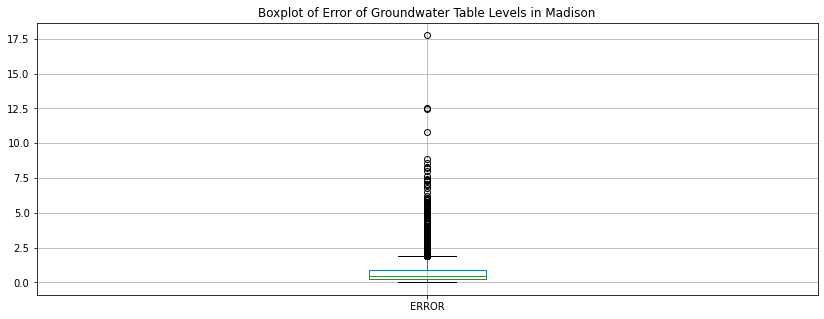

In [44]:
fig100 = plt.figure()
plt.title("Boxplot of Error of Groundwater Table Levels in Madison")
error_MAD=error.boxplot(column=['ERROR'], return_type='axes')
print(error['ERROR'].min())
print(error['ERROR'].max())

In [45]:
fig100.savefig('error_Mad30.png', bbox_inches='tight')

In [46]:
error.describe()

,Actual,Prediction,ERROR
count,3300.000000,3300.000000,3300.000000
mean,33.196737,33.355015,0.782327
std,3.166258,2.604894,1.079766
min,17.453750,25.036180,0.000221
25%,31.012500,31.674880,0.247215
50%,33.890417,33.865707,0.469864
75%,35.680208,35.563427,0.905570
max,37.848333,37.132393,17.752389


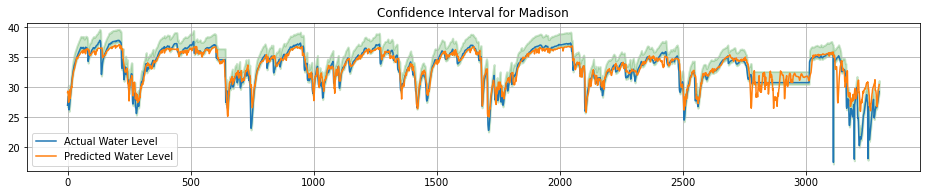

In [47]:
look_back = 500
std_part = 0.98  # use values from 0 to 1 if you have an idea what part of STD should be used.
test2_Mad30=plt.figure(figsize=(16, 6))
ax1 = plt.subplot(211)
act_lb = error['Prediction']
pred_lb = error['Actual']
err_std = error['ERROR'].std(axis=0)
err_mean = error['ERROR'].mean(axis=0)
pred_upper = pred_lb + err_mean + err_std * std_part
pred_lower = pred_lb + err_mean - err_std * std_part
err_x = np.linspace(0, len(act_lb)-1, len(act_lb))
plt.plot(error['Actual'], label='Actual Water Level ')
plt.plot(error['Prediction'], label='Predicted Water Level')
plt.fill_between(x=err_x, y1=pred_upper, y2=pred_lower, color='green', lw=2, alpha=0.2)
plt.legend()
plt.grid()
plt.title('Confidence Interval for Madison')

test2_Mad30.show()

In [48]:
test2_Mad30.savefig('CI_Mad30.png')

In [49]:
x_values = Madison['Daily_WL']
y_values = Madison['PRCP']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.001903600223572445


In [50]:
x_values = Madison['Daily_WL']
y_values = Madison['TMAX']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.1355490972994341


In [51]:
x_values = Madison['Daily_WL']
y_values = Madison['TMIN']

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy =  correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.10572784762767755
